# CODING ETIQUETTE & EXCEL REPORTING (Task)

# 1. Installing libraries

# 2. Importing 'orders_products_customers_merged.pkl' as 'ords_prods_cust'

# 3. Security implications for this data

# 4. Creating a “Region” column based on the “State” column

# 5. Creating an exclusion flag for low-activity customers (< 5 orders) and exclude them from the data

# 6. Creating a profiling variable

# 7. Creating bar chart to show the distribution of profiles

# 8. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

# 9. Comparing customer profiles with regions

# 10. Comparing customer profiles with ordering habits

# 11. Comparing customer profiles with spending habits

# 12. Producing and exporting charts to illustrate results

# 13. Exporting the final data set 'ords_prods_cust_with_profile'

# 14. Additional charts for the final report

In [1]:
# ----------------------------------------------

# 1. Installing libraries

In [2]:
# Install libraries:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing 'orders_products_customers_merged.pkl' as 'ords_prods_cust'

In [3]:
# Define the path:
    
path = r'/Users/elena/Documents/Data Analytics Course/4. Python fundamentals for Data Analysts/Instacart Basket Analysis'

In [4]:
# Import 'orders_products_customers_merged.pkl':

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared data','orders_products_customers_merged.pkl'))

In [5]:
# Show all the columns:

pd.set_option('display.max_columns', None)

In [6]:
# Shape of "ords_prods_cust':

ords_prods_cust.shape

(32404859, 35)

In [7]:
ords_prods_cust.head()

,user_id,first_name,last_name,Gender,STATE,Age,no_of_dependants,fam_status,income,Unnamed: 0.1,Unnamed: 0_x,order_id,order_number,orders_day_of_week,"time_of_order, hour",days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busy_slow_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since,frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443895,443895,2543867,5,1,9,30.0,196,2,0,195,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443897,443897,1285508,7,5,15,11.0,196,1,1,195,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443898,443898,2578584,8,1,15,10.0,196,2,1,195,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443892,443892,423547,2,2,9,14.0,38928,1,0,38932,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,443893,2524893,3,3,11,30.0,38928,1,1,38932,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 3. Security implications for this data

The Customer Data Set, if it were a dataframe made of real data, would be considered PII. Since for the purpose of the current project the data in Customer Data Set was improvised, analyzing the data and publishing the results thereof do not contradict the data security practices.

# 4. Creating a “Region” column based on the “State” column

In [8]:
# Create a list that contains values: 'Region 1', 'Region 2', 'Region 3' and 'Region 4'

regions = []

for x in ords_prods_cust['STATE']:
    if x == 'Maine' or x == 'New Hampshire' or x == 'Vermont' or x == 'Massachusetts' or x == 'Rhode Island' or x == 'Connecticut' or x == 'New York' or x =='Pennsylvania' or x == 'New Jersey':
        regions.append('Region 1')
    elif x == 'Wisconsin' or x == 'Michigan' or x == 'Illinois' or x == 'Indiana' or x == 'Ohio' or x == 'North Dakota' or x == 'South Dakota' or x == 'Nebraska' or x == 'Kansas' or x == 'Minnesota' or x == 'Iowa' or x == 'Missouri':
        regions.append('Region 2')                
    elif x == 'Delaware' or x == 'Maryland' or x == 'District of Columbia' or x == 'Virginia' or x == 'West Virginia' or x == 'North Carolina' or x == 'South Carolina' or x == 'Georgia' or x == 'Florida' or x == 'Kentucky' or x == 'Tennessee' or x == 'Mississippi' or x == 'Alabama' or x == 'Oklahoma' or x == 'Texas' or x == 'Arkansas' or x == 'Louisiana':
        regions.append('Region 3')
    else:
        regions.append('Region 4')# 4. Creating a “Region” column based on the “State” column

In [9]:
# Create a new column 'Region' and populate it with 'regions' list:

ords_prods_cust['Region'] = regions

In [10]:
# Cross 'Region' and 'spending_flag' to find the difference in spending among regions:

crosstab = pd.crosstab(ords_prods_cust['Region'], ords_prods_cust['spending_flag'], dropna = False)

In [11]:
crosstab.to_clipboard()

#### Determine whether there’s a difference in spending habits between the different U.S. regions. 

# 5. Creating an exclusion flag for low-activity customers (< 5 orders) and exclude them from the data

In [12]:
# Create 'max_order' column with number of orders for each customer:
    
ords_prods_cust['max_order'] = ords_prods_cust.groupby(['user_id'])['order_number'].transform(np.max)

In [13]:
# Create a 'low_activity_flag' based on the amount of orders:

ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'low_activity_flag'] = 'Low-activity customer'

In [14]:
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'low_activity_flag'] = 'Active customer'

In [15]:
# Create a low_activity_cust_sample:

low_act_cust_sample = ords_prods_cust[ords_prods_cust['low_activity_flag'] == 'Low-activity customer']

In [16]:
# Export the 'Low-activity customer' sample:

low_act_cust_sample.to_pickle(os.path.join(path, '02 Data','Prepared Data','low_activity_customer_sample.pkl'))

In [17]:
low_act_cust_sample.shape

(1440295, 37)

In [18]:
# Exclude 'Low-activity customer' from the data:
    
ords_prods_cust = ords_prods_cust[ords_prods_cust['low_activity_flag'] == 'Active customer']

In [19]:
ords_prods_cust.shape

(30964564, 37)

In [20]:
ords_prods_cust['low_activity_flag'].value_counts(dropna = False)

Active customer    30964564
Name: low_activity_flag, dtype: int64

# 6. Creating a profiling variable

In [21]:
ords_prods_cust.head()

,user_id,first_name,last_name,Gender,STATE,Age,no_of_dependants,fam_status,income,Unnamed: 0.1,Unnamed: 0_x,order_id,order_number,orders_day_of_week,"time_of_order, hour",days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busy_slow_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since,frequency_flag,_merge,Region,low_activity_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443895,443895,2543867,5,1,9,30.0,196,2,0,195,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Active customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443897,443897,1285508,7,5,15,11.0,196,1,1,195,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Active customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443898,443898,2578584,8,1,15,10.0,196,2,1,195,Soda,77,7,9.0,Mid range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Active customer
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443892,443892,423547,2,2,9,14.0,38928,1,0,38932,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Active customer
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,443893,443893,2524893,3,3,11,30.0,38928,1,1,38932,0% Greek Strained Yogurt,120,16,12.6,Mid range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Region 2,Active customer


In [22]:
# Create a function for assigning customer profiles:

def profile(row):
    
    if row['department_id'] == 5:
        return 'Drinker'
    elif row['department_id'] == 8:
        return 'Pet Owner'
    elif (row['Age'] < 30) and (row ['no_of_dependants'] > 0):
        return 'Young Parent'
    elif (row['Age'] >= 25) and (row['Age'] <65) and (row['no_of_dependants'] == 0) and (row['fam_status'] == 'single'):
        return 'Single Adult No Kids' 
    elif (row['Age'] >= 65) and (row['no_of_dependants'] == 0):
        return 'Retiree'
    elif (row['no_of_dependants'] > 3):
        return 'Big Family'
    elif (row['no_of_dependants'] > 0) and (row['Age'] >= 30):
        return 'Parent Over 30'
    else: return 'Not defined'
                                        
ords_prods_cust['profile'] = ords_prods_cust.apply(profile, axis=1)

# 7. Creating bar chart to show the distribution of profiles

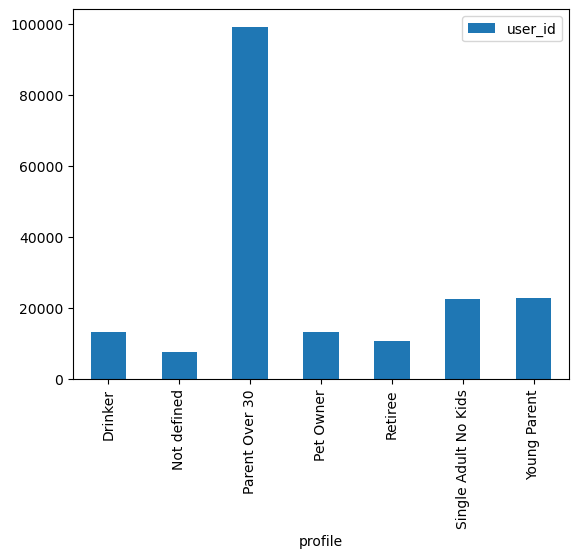

In [23]:
# Count unique user ids by profile and create a bar chart:

unique_user_ids_by_profile = ords_prods_cust.groupby('profile').agg({'user_id': 'nunique'})
bar_profile_user_id = unique_user_ids_by_profile.plot.bar()

# 8. Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [61]:
# Find average number of orders for each profile:

max_mean_min_maxorder_by_profile = ords_prods_cust.groupby('profile').agg({'max_order': ['max', 'mean', 'min']})
max_mean_min_maxorder_by_profile

max_order               
                           max       mean min
profile                                      
Drinker                     99  31.642598   5
Not defined                 99  34.887656   5
Parent Over 30              99  34.340529   5
Pet Owner                   99  30.903740   5
Retiree                     99  34.462602   5
Single Adult No Kids        99  34.734389   5
Young Parent                99  34.489817   5

In [25]:
# Find average expenditure amount for each profile:

max_mean_min_prices_by_profile = ords_prods_cust.groupby('profile').agg({'prices': ['max', 'mean', 'min']})
max_mean_min_prices_by_profile

prices                
                          max       mean  min
profile                                      
Drinker                  15.0   8.150699  1.0
Not defined           99999.0  12.055893  1.0
Parent Over 30        99999.0  11.860509  1.0
Pet Owner                15.0   7.887489  1.0
Retiree               99999.0  12.041107  1.0
Single Adult No Kids  99999.0  12.206583  1.0
Young Parent          99999.0  12.104619  1.0

# 9. Comparing customer profiles with regions

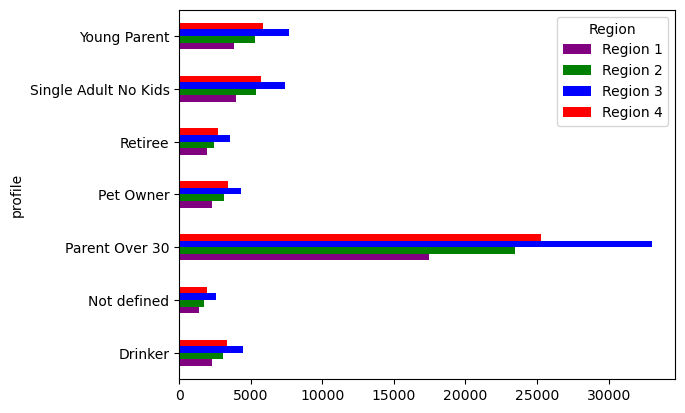

In [26]:
# Count unique user_ids by 'profile' and 'Region':

unique_user_ids_by_profile_by_region = ords_prods_cust.groupby(['profile', 'Region'], as_index = False).agg({'user_id': 'nunique'})

bar_profiles = unique_user_ids_by_profile_by_region.pivot(index='profile', columns='Region', values='user_id')

bar_profile_region = bar_profiles.plot.barh(color = ['purple', 'green', 'blue', 'red'])

# 10. Comparing customer profiles with ordering habits

In [27]:
# Bar chart on profiles vs. ordering habits (frequency of orders):

profile_frequency = ords_prods_cust.groupby(['profile', 'frequency_flag'], as_index = False).agg({'user_id': 'nunique'})

profile_frequency

,profile,frequency_flag,user_id
0,Drinker,Frequent customer,7379
1,Drinker,Non-frequent customer,1876
2,Drinker,Regular customer,3896
3,Not defined,Frequent customer,3911
4,Not defined,Non-frequent customer,1304
5,Not defined,Regular customer,2360
6,Parent Over 30,Frequent customer,52007
7,Parent Over 30,Non-frequent customer,17089
8,Parent Over 30,Regular customer,30119
9,Pet Owner,Frequent customer,7621


In [28]:
profile_frequency = profile_frequency.pivot(index='profile', columns='frequency_flag', values='user_id')

profile_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
profile,,,
Drinker,7379,1876,3896
Not defined,3911,1304,2360
Parent Over 30,52007,17089,30119
Pet Owner,7621,1634,3920
Retiree,5672,1787,3242
Single Adult No Kids,11679,3861,6906
Young Parent,11934,3910,6826


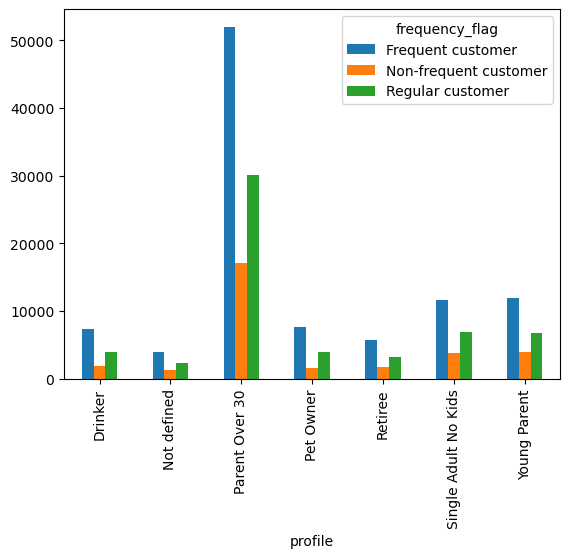

In [29]:
bar_profile_frequency = profile_frequency.plot.bar()

# 11. Comparing customer profiles with spending habits

In [30]:
# Bar chart on profiles vs. spending habits (spending_flag):

profile_spending = ords_prods_cust.groupby(['profile', 'spending_flag'], as_index = False).agg({'user_id': 'nunique'})

profile_spending

,profile,spending_flag,user_id
0,Drinker,High spender,815
1,Drinker,Low spender,12336
2,Not defined,High spender,155
3,Not defined,Low spender,7420
4,Parent Over 30,High spender,2272
5,Parent Over 30,Low spender,96943
6,Pet Owner,High spender,409
7,Pet Owner,Low spender,12766
8,Retiree,High spender,248
9,Retiree,Low spender,10453


In [31]:
profile_spending = profile_spending.pivot(index='profile', columns='spending_flag', values='user_id')

profile_spending

spending_flag,High spender,Low spender
profile,,
Drinker,815,12336
Not defined,155,7420
Parent Over 30,2272,96943
Pet Owner,409,12766
Retiree,248,10453
Single Adult No Kids,523,21923
Young Parent,500,22170


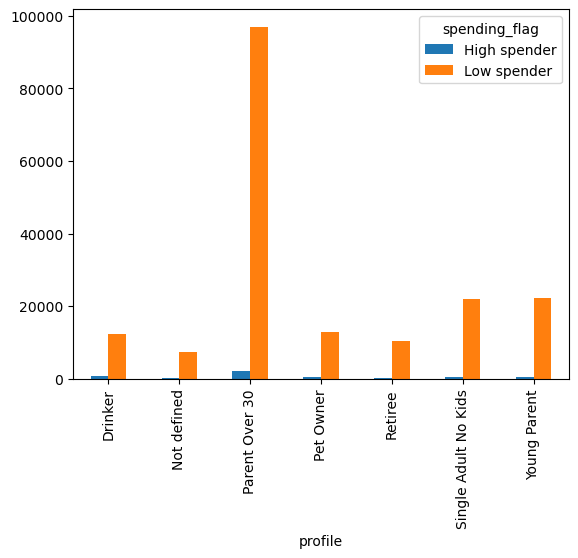

In [32]:
bar_profile_spending = profile_spending.plot.bar()

#### Due to fabricated nature of considerable amount of the data there are no differencies among profiles.

# 12. Producing and exporting charts to illustrate results

In [33]:
# Export BAR CHART of count of unique user ids by profile:

bar_profile_user_id.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unique_user_ids_by_profile.png'))

In [62]:
# Exporting max_mean_min_maxorder_by_profile:

max_mean_min_maxorder_by_profile.to_csv(os.path.join(path, '02 Data','Prepared Data','max_mean_min_maxorder_by_profile.csv'))

In [35]:
# Exporting max_mean_min_prices_by_profile:

max_mean_min_prices_by_profile.to_csv(os.path.join(path, '02 Data','Prepared Data','max_mean_min_prices_by_profile.csv'))

In [36]:
# Export BAR CHART of count of unique user ids by profile for each region:

bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_region.png'))

In [37]:
# Exporting profile_frequency:

profile_frequency.to_csv(os.path.join(path, '02 Data','Prepared Data','profile_frequency.csv'))

In [38]:
# Export BAR CHART of count of unique user ids by profile for frequency flags:

bar_profile_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_frequency.png'))

In [39]:
# Exporting profile_spending:

profile_spending.to_csv(os.path.join(path, '02 Data','Prepared Data','profile_spending.csv'))

In [40]:
# Export BAR CHART of count of unique user ids by profile for spending flags:

bar_profile_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_spending.png'))

# 13. Exporting the final data set 'ords_prods_cust_with_profile'

In [41]:
# Export 'ords_prods_cust' as 'ords_prods_cust_with_profile':

ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_cust_with_profile.pkl'))

In [42]:
ords_prods_cust.shape

(30964564, 38)

# 14. Additional charts for the final report

In [43]:
low_act_cust_sample.shape

(1440295, 37)

<AxesSubplot:>

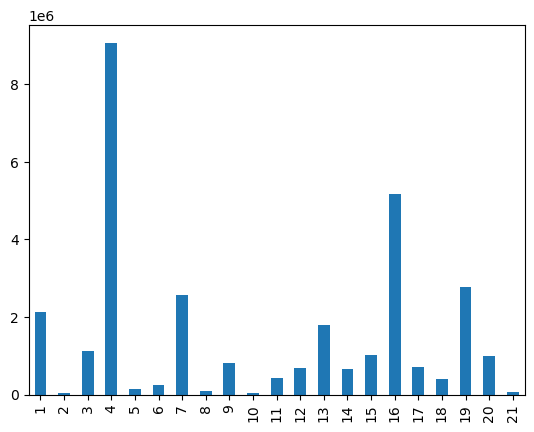

In [44]:
ords_prods_cust['department_id'].value_counts().sort_index().plot.bar()

In [52]:
# Bar chart on profiles vs. ordering habits (frequency of orders):

region_frequency = ords_prods_cust.groupby(['Region', 'frequency_flag'], as_index = False).agg({'user_id': 'nunique'})

region_frequency

,Region,frequency_flag,user_id
0,Region 1,Frequent customer,15028
1,Region 1,Non-frequent customer,4826
2,Region 1,Regular customer,8727
3,Region 2,Frequent customer,19944
4,Region 2,Non-frequent customer,6695
5,Region 2,Regular customer,11737
6,Region 3,Frequent customer,28382
7,Region 3,Non-frequent customer,9381
8,Region 3,Regular customer,16430
9,Region 4,Frequent customer,21862


In [53]:
region_frequency = region_frequency.pivot(index='Region', columns='frequency_flag', values='user_id')

region_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Region,,,
Region 1,15028,4826,8727
Region 2,19944,6695,11737
Region 3,28382,9381,16430
Region 4,21862,7053,12566


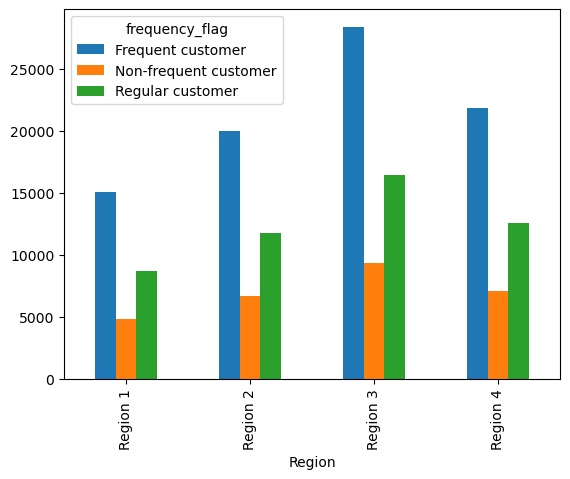

In [54]:
bar_region_frequency = region_frequency.plot.bar()

In [55]:
# Bar chart on loyalty vs. ordering habits (frequency of orders):

loyalty_frequency = ords_prods_cust.groupby(['loyalty_flag', 'frequency_flag'], as_index = False).agg({'user_id': 'nunique'})

loyalty_frequency

,loyalty_flag,frequency_flag,user_id
0,Loyal customer,Frequent customer,17011
1,Loyal customer,Regular customer,6
2,New customer,Frequent customer,23985
3,New customer,Non-frequent customer,22770
4,New customer,Regular customer,21995
5,Regular customer,Frequent customer,44220
6,Regular customer,Non-frequent customer,5185
7,Regular customer,Regular customer,27459


In [57]:
loyalty_frequency = loyalty_frequency.pivot(index='loyalty_flag', columns='frequency_flag', values='user_id')

loyalty_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,17011.0,NaN,6.0
New customer,23985.0,22770.0,21995.0
Regular customer,44220.0,5185.0,27459.0


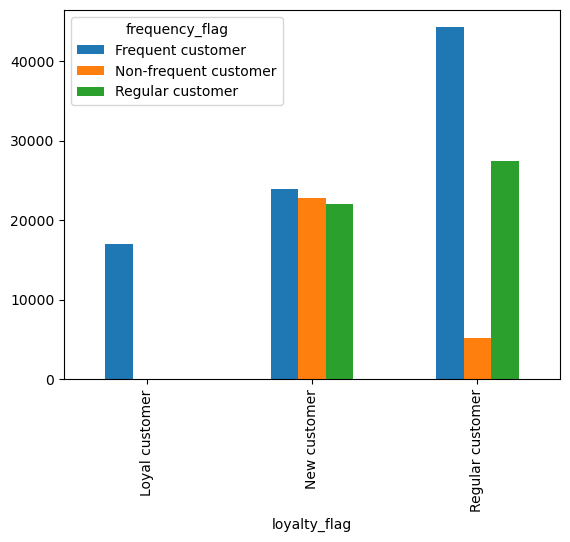

In [58]:
bar_loyalty_frequency = loyalty_frequency.plot.bar()